# Deep Feed Forward Artificial Neural Network
### With Neuron State Visualization

The point of this project was to understand _multilayer ANNs_ by building one from scratch.
The network uses sigmoid as activation function and is capable of visualizing what each neuron is "looking for" when applied to 2D clasification problems.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from pprint import pprint
from copy import copy
%matplotlib inline

In [2]:
class NeuralNetwork(object):
    def __init__(self, inputs, layers, learning_rate, verbose=False):
        #parameters
        self.inputSize = inputs
        self.layersNum = len(layers)
        self.layerSizes = np.array(layers)
        self.learning_rate = learning_rate
        #weights
        extended = np.hstack(([inputs], layers)).ravel()
        self.weights = [np.random.randn(extended[i], extended[i+1]) for i in range(len(extended)-1)]
        #layers
        self.layers = [np.zeros(i, dtype="float64") for i in layers]
        #debugging
        self.verbose = verbose
        
    def forward(self, X):
        self.layers[0] = self.sigmoid(np.dot(X, self.weights[0]))
        for i in range(1, self.layersNum):
            self.layers[i] = self.sigmoid(np.dot(self.layers[i - 1], self.weights[i]))
        return self.layers[-1]

    def sigmoid(self, s):
        # activation function 
        return 1 / (1 + np.exp(-s))

    def sigmoidPrime(self, s):
        #derivative of sigmoid
        return s * (1 - s)

    def backward(self, X, y, o):
        # backward propagate through the network
        deltas = copy(self.layers)
        
        error = y - o # error in output
        deltas[-1] = error * self.sigmoidPrime(o) # applying derivative of sigmoid to error
        
        for i in range(self.layersNum - 2, -1, -1):
            if self.verbose: print("Updating deltas", i)
            error = np.dot(deltas[i+1], self.weights[i+1].T) # 1x4
            if self.verbose:
                print("Error", i)
                pprint(error)
            deltas[i] = error * self.sigmoidPrime(self.layers[i]) #1x4
        
        self.weights[0] += self.learning_rate * np.dot(X.T, deltas[0])
        
        for i in range(1, self.layersNum):
            self.weights[i] += self.learning_rate * np.dot(self.layers[i-1].T, deltas[i])
            
    def train (self, X, y):
        o = self.forward(X)
        self.backward(X, y, o)
        
    def batch_train(self, X, y, batch_size):
        da_range = range(0, np.shape(y)[0], np.shape(y)[0] // batch_size)
        batches = np.split(X, da_range)
        ys = np.split(y, da_range)
        for i in range(len(da_range)):
            self.train(batches[i], ys[i])
            
    def visualize(self, radius):
        xys = np.array([x for x in range(-radius*10, radius*10)])
        xys = np.array(np.meshgrid(xys, xys)).T.reshape(-1, 2)
        xysq = xys / 10
        xysq = prepare(xysq)
        outs = self.forward(xysq)
        image = outs.ravel().reshape(radius*20, radius*20).T

        fig, ax = plt.subplots(1,2)
        fig.set_size_inches(12,4)
        sns.heatmap(image, square=True, vmin=0, vmax=1, cmap="coolwarm", xticklabels=False, yticklabels=False, ax=ax[0]).invert_yaxis()
        ax[0].set_title("Network output")
        sns.heatmap(np.round(image), vmin=0, vmax=1, square=True, cmap="coolwarm", xticklabels=False, yticklabels=False, ax=ax[1]).invert_yaxis()
        ax[1].set_title("Discrete output")
        
    def visualize_points(self, X, projection):
        outs = self.forward(X)
        image = [np.where(row > 0.5)[0][0] for row in outs]
        fig = plt.figure()
        
        if projection=="2D": 
            ax = fig.add_subplot(111)
            plt.scatter(X[:,0], X[:,1], c=image)
        elif projection=="3D":
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(X[:,0], X[:,1], X[:,2], c=image)
        
    def inspect(self, radius):
        xys = np.array([x for x in range(-radius*10, radius*10)])
        xys = np.array(np.meshgrid(xys, xys)).T.reshape(-1, 2)
        xysq = xys / 10
        xysq = prepare(xysq)

        NN.forward(xysq)

        neurons = []

        for i in range(NN.layersNum - 1):
            neurons.append(len(NN.layers[i][0]))

        width = np.max(neurons)
        width = np.maximum(width, np.shape(xysq)[1])
        height = NN.layersNum    

        fig, ax = plt.subplots(height, width)
        fig.set_size_inches(width * 5, height * 4)

        # input vectors visualization
        for i in range(np.shape(xysq)[1]):
            data = xysq[:,i]
            data = data.reshape(radius*20, radius*20).T
            sns.heatmap(data, cmap="coolwarm", xticklabels=False, yticklabels=False, ax=ax[0, i]).invert_yaxis()
            ax[0,i].set_title("Input [" + str(i) +"]")
        for i in range(np.shape(xysq)[1], width): ax[0,i].axis("off")

        # hidden neurons visualization 
        for i in range(NN.layersNum - 1):
            for j in range(neurons[i]):
                neuron = NN.layers[i].T[j]
                image = neuron.reshape(radius*20, radius*20).T
                sns.heatmap(image, vmin=0, vmax=1, cmap="coolwarm", xticklabels=False, yticklabels=False, ax=ax[i+1,j]).invert_yaxis()
                ax[i+1,j].set_title("Neuron [" + str(i) +"][" + str(j) +"]")
            for j in range(neurons[i], width): ax[i+1,j].axis("off")

### XOR problem
The XOR function is well known for its non-linearity. Here you can see that a simple 3 neuron network can approximate XOR pretty well. 

Loss:  0.248301177041
Loss:  0.143171128238
Loss:  0.00901524251368
Loss:  0.00247763343303
Loss:  0.00139233840583
Loss:  0.000959823077022
Loss:  0.000729422303921
Loss:  0.000586908362046
Loss:  0.000490286998252
Loss:  0.000420575088354
Loss:  0.000367962665547
Predictions
array([[ 0.02012977],
       [ 0.98257075],
       [ 0.97963155],
       [ 0.0186545 ]])


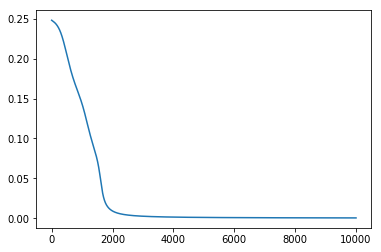

In [11]:
X = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])
y = np.array([[0],[1],[1],[0]])

NN = NeuralNetwork(np.shape(X)[1], [3,1], learning_rate=0.3, verbose=False)
losses = []
epochs = 10000
for epoch in range(epochs+1):
    #NN.batch_train(X, y, 10)
    NN.train(X,y)
    loss = np.mean(np.square(y - NN.forward(X)))
    if epoch%(epochs//10) == 0: print("Loss: ", loss)
    losses.append(loss)

plt.plot(losses)
print("Predictions")
pprint(NN.forward(X))

### 2D Classification
Let's define prepare() function which takes an array of (x, y) coordinates and expands it to an array which contains more features (like x * y, x ^ 2 etc.) and bias value. This will help introduce non-linearity to our network.

In [12]:
def prepare(X):
    return np.array([[x, y, x * y, 1] for x,y in X])/np.amax(X)

Now, let's create a simple dataset. We have points in 2D space, coordinates ranging from (-6, -6) to (6, 6), that are assigned either of two classes: blue or red.

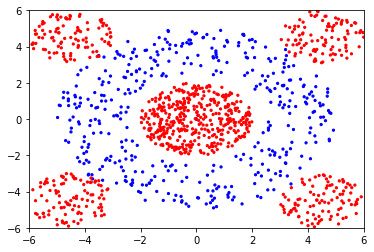

In [15]:
def add_circle(xs, ys, a, b, r, val, n, r2=0):
    i = 0
    ret = np.array([[a, b]])
    while(i < n - 1):
        (x,y) = np.random.rand(2) * 12 - 6
        if (x-a)**2 + (y-b)**2 <= r**2 and (x-a)**2 + (y-b)**2 >= r2**2:
            ret = np.append(ret, [[x, y]], axis=0)
            i += 1
    return np.append(xs, ret, axis=0), np.append(ys, np.array([[val] for x in range(n)]), axis=0)

# circle in a circle surrounded by circles
X = np.array([[0,0]])
y = np.array([[0]])
X, y = add_circle(X, y, 0, 0, 5, 0, 400, r2=2.5)
X, y = add_circle(X, y, 0, 0, 2, 1, 400)
X, y = add_circle(X, y, -4.5, -4.5, 1.5, 1, 100)
X, y = add_circle(X, y, -4.5, 4.5, 1.5, 1, 100)
X, y = add_circle(X, y, 4.5, -4.5, 1.5, 1, 100)
X, y = add_circle(X, y, 4.5, 4.5, 1.5, 1, 100)

xs = [x[0] for x in X]
ys = [x[1] for x in X]
colors = ["red" if x[0] == 1 else "blue" for x in y]
plt.scatter(xs, ys, s=5, c=colors)
plt.xlim(-6, 6)
plt.ylim(-6, 6)

trainX = prepare(X)
testX = prepare(X + np.random.randn(np.shape(X)[0], np.shape(X)[1])/10)

Alternatively, we may want an even simpler dataset. For each point: if both coordinates are positive, it's red, otherwise it's blue.

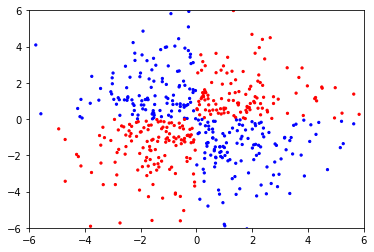

In [14]:
def condition(x,y):
    return x*y > 0

X = np.random.randn(500, 2)*2
y = np.array([[condition(a,b)] for a,b in X])

xs = [x[0] for x in X]
ys = [x[1] for x in X]
colors = ["red" if val == 1 else "blue" for val in y]
plt.scatter(xs, ys, s=5, c=colors)
plt.xlim(-6, 6)
plt.ylim(-6, 6)

X = prepare(X)

Now, let's initialize our network with two hidden layers, four neurons each, and one output layer.

In [21]:
NN = NeuralNetwork(trainX.shape[1], [4, 4, 1], learning_rate=0.03, verbose=False)

Evaluating next cell starts training, after it's complete, you will see a plot of loss function calculated on training and test datesets.
Reevaluating this cell trains the network further.

Train loss: 0.293098200576 Test loss: 0.293251849931
Train loss: 0.0537176463474 Test loss: 0.0551258669302
Train loss: 0.0166147896284 Test loss: 0.0181266051768
Train loss: 0.0103389410776 Test loss: 0.0112703327168
Train loss: 0.0100867440233 Test loss: 0.0110414747409
Train loss: 0.00923735213776 Test loss: 0.00996474731988
Train loss: 0.00870850737662 Test loss: 0.00926923304036
Train loss: 0.0083511340991 Test loss: 0.00879654846007
Train loss: 0.00808056561972 Test loss: 0.00843812127535
Train loss: 0.00786256599024 Test loss: 0.00814925191105
Train loss: 0.00767873840582 Test loss: 0.00790642365043


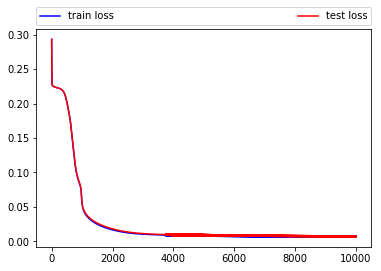

In [22]:
NN.learning_rate = 0.01
train_losses, test_losses = [], []
epochs = 10000
for epoch in range(epochs + 1):
    NN.batch_train(trainX, y, 10)
    #NN.train(X,y)
    train_loss = np.mean(np.square(y - NN.forward(trainX)))
    test_loss = np.mean(np.square(y - NN.forward(testX)))
    if epoch%(epochs//10) == 0:
        print("Train loss:", train_loss, "Test loss:", test_loss)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

plt.plot(train_losses, 'b-', label="train loss")
plt.plot(test_losses, 'r-', label="test loss")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

Now, let's visualize what our network thinks of this 2D space by feeding forward entire 12 x 12 area and plotting which class gets assigned to each point

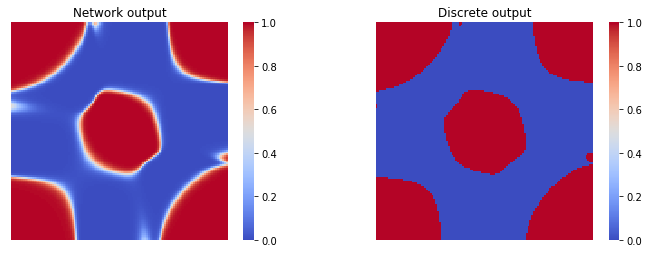

In [23]:
NN.visualize(radius=6)

Here's the _coolest_ part: we can feed our space to each neuron separetely and see how it modifies input. This is a way to visualize what "shapes" is each neuron looking for.

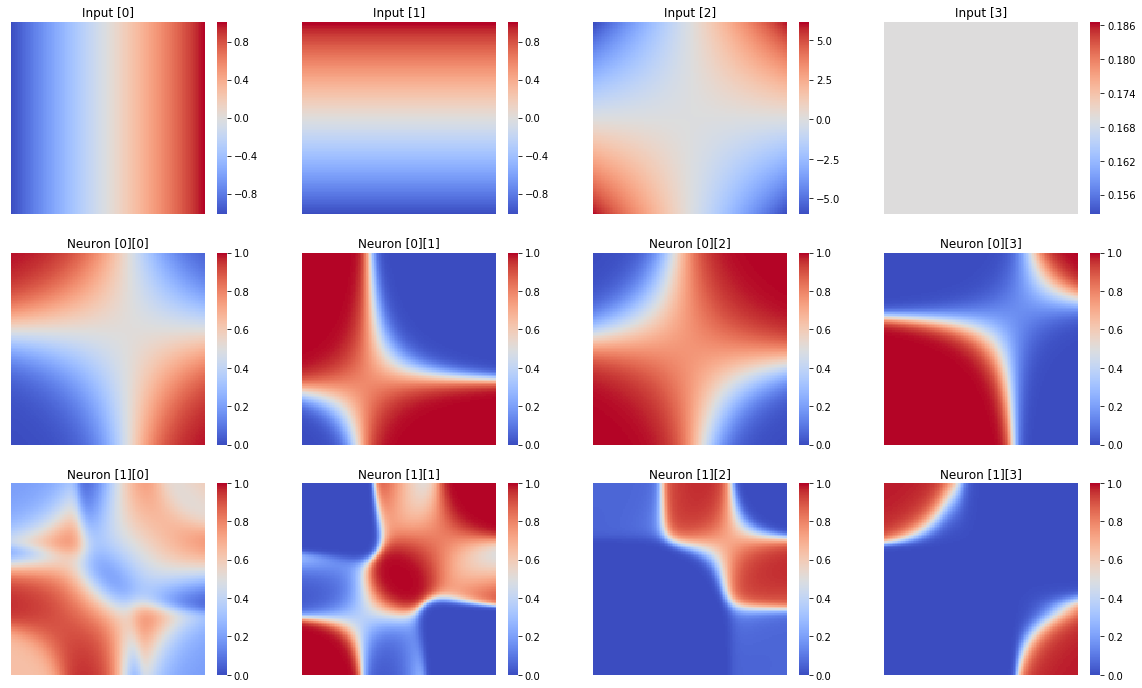

In [24]:
NN.inspect(radius=6)

### Iris flower data set

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features, we'll train our network to distinguish these species.

In [25]:
iris = sns.load_dataset("iris")
np.shape(iris)

(150, 5)

Here we assign classes using one-hot encoding, since there are three classes, out network's output's going to be a length 3 vector with the highest value indicating the species.

In [26]:
trainX = np.array(iris)[:,:-1]
trainY = np.array([[1,0,0]*50, [0,1,0]*50, [0,0,1]*50], dtype="float64").reshape(150,3)
trainX = trainX.astype("float64")

Let's train our model and see if it can learn to recognize each type of flower.

Loss:  0.393827509734
Loss:  0.0324952440407
Loss:  0.018445385621
Loss:  0.0117369424533
Loss:  0.00938703395526
Loss:  0.00818486353046
Loss:  0.00649151244847
Loss:  0.00528229999086
Loss:  0.00493361666352
Loss:  0.00483463875508
Loss:  0.00477774817967


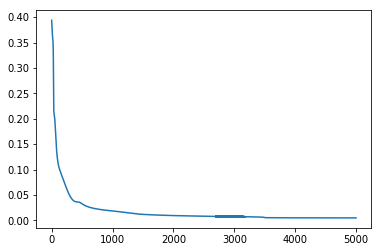

In [28]:
Flowey = NeuralNetwork(np.shape(trainX)[1], [10,10,10,3], learning_rate=0.01, verbose=False)
losses = []
epochs = 5000
for epoch in range(epochs + 1):
    Flowey.batch_train(trainX, trainY, 10)
    #Flowey.train(X,y)
    loss = np.mean(np.square(trainY - Flowey.forward(trainX)))
    if epoch%(epochs//10) == 0: print("Loss: ", loss)
    losses.append(loss)
plt.plot(losses)

Here we plot our data points in 2D and 3D space, using colour to denote each species.

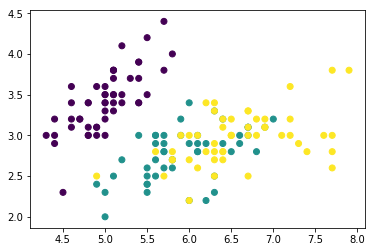

In [29]:
Flowey.visualize_points(trainX, projection="2D")

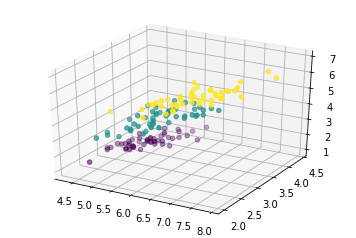

In [30]:
Flowey.visualize_points(trainX, projection="3D")

### MNIST dataset
The _Hello World_ of machine learning - a dataset containing lots of handwritten digits, each assigned a correct label.

In [31]:
from keras.datasets import mnist
(X_train_mnist, Y_train_mnist), (X_test_mnist, Y_test_mnist) = mnist.load_data()
print("X train shape:", X_train_mnist.shape)
print("Y train shape:", Y_train_mnist.shape)

Using TensorFlow backend.


X train shape: (60000, 28, 28)
Y train shape: (60000,)


5


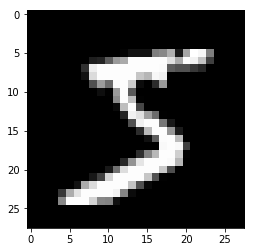

In [32]:
digit = X_train_mnist[0]
print(Y_train_mnist[0])
plt.imshow(digit, interpolation = "nearest", cmap = "gray")
plt.show()

In [33]:
X_train_mnist = X_train_mnist.reshape(60000, 28*28)
X_test_mnist = X_test_mnist.reshape(10000, 28*28)
Y_train_mnist = np.eye(10)[Y_train_mnist]
Y_test_mnist = np.eye(10)[Y_test_mnist]
print("X train shape:", X_train_mnist.shape)
print("Y train shape:", Y_train_mnist.shape)

X train shape: (60000, 784)
Y train shape: (60000, 10)


In [34]:
mnist_model = NeuralNetwork(784, [200,10], 0.003)

/Users/jakub/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp


Train loss: 0.0972522424101 Test loss: 0.0972276163061
Train loss: 0.0851188814554 Test loss: 0.0849468668395
Train loss: 0.0733579322496 Test loss: 0.0734068115688
Train loss: 0.0697443928324 Test loss: 0.0698413370727
Train loss: 0.068024312197 Test loss: 0.068410682052
Train loss: 0.0669867839907 Test loss: 0.0674955985058
Train loss: 0.0663714318043 Test loss: 0.0666419779978
Train loss: 0.0656347836123 Test loss: 0.0660612209423
Train loss: 0.0652978146452 Test loss: 0.0659648022248
Train loss: 0.0643722498151 Test loss: 0.0651478228242
Train loss: 0.062681934556 Test loss: 0.0633337649175


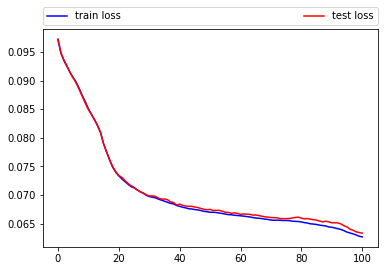

In [35]:
mnist_model.learning_rate = 0.001
train_losses, test_losses = [], []
epochs = 100
for epoch in range(epochs + 1):
    mnist_model.batch_train(X_train_mnist, Y_train_mnist, 50)
    #NN.train(X,y)
    train_loss = np.mean(np.square(Y_train_mnist - mnist_model.forward(X_train_mnist)))
    test_loss = np.mean(np.square(Y_test_mnist - mnist_model.forward(X_test_mnist)))
    if epoch%(epochs//10) == 0:
        print("Train loss:", train_loss, "Test loss:", test_loss)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

plt.plot(train_losses, 'b-', label="train loss")
plt.plot(test_losses, 'r-', label="test loss")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

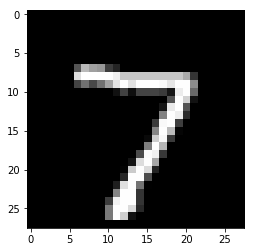

[[  3.70460914e-09   8.08760103e-11   2.93292376e-08   2.62137553e-07
    1.18305274e-09   1.53894259e-09   3.53955993e-16   9.99999990e-01
    1.92004360e-10   4.75473985e-09]]


/Users/jakub/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp


In [37]:
digit = X_test_mnist[0].reshape(28, 28)
plt.imshow(digit, interpolation = "nearest", cmap = "gray")
plt.show()
print(mnist_model.forward(digit.reshape(1, 28*28)))